<a href="https://colab.research.google.com/github/Kaushik-29/ML_Practice/blob/main/Practice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1, Loss: 1.00000
Iteration 1, Loss: 0.96077
Iteration 2, Loss: 0.92310
Iteration 3, Loss: 0.88692
Iteration 4, Loss: 0.85217
Iteration 5, Loss: 0.81879
Iteration 6, Loss: 0.78674
Iteration 7, Loss: 0.75596
Iteration 8, Loss: 0.72640
Iteration 9, Loss: 0.69800
Iteration 10, Loss: 0.67073
Iteration 11, Loss: 0.64455
Iteration 12, Loss: 0.61939
Iteration 13, Loss: 0.59524
Iteration 14, Loss: 0.57204
Iteration 15, Loss: 0.54976
Iteration 16, Loss: 0.52836
Iteration 17, Loss: 0.50781
Iteration 18, Loss: 0.48807
Iteration 19, Loss: 0.46912
Iteration 20, Loss: 0.45091
Iteration 21, Loss: 0.43343
Iteration 22, Loss: 0.41664
Iteration 23, Loss: 0.40051
Iteration 24, Loss: 0.38502
Iteration 25, Loss: 0.37015
Iteration 26, Loss: 0.35586
Iteration 27, Loss: 0.34214
Iteration 28, Loss: 0.32897
Iteration 29, Loss: 0.31631
Iteration 30, Loss: 0.30416
Iteration 31, Loss: 0.29249
Iteration 32, Loss: 0.28128
Iteration 33, Loss: 0.27051
Iteration 34, Loss: 0.26017
Iteration 35, Loss: 0.25024
It

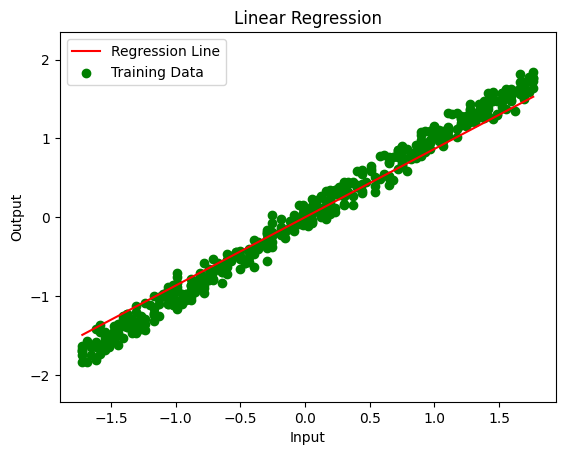

Input: 5.0, Predicted: 10.547, Actual: 7.682
Input: 61.0, Predicted: 59.317, Actual: 61.019
Input: 47.0, Predicted: 47.124, Actual: 53.606
Input: 98.0, Predicted: 91.540, Actual: 94.477
Input: 30.0, Predicted: 32.319, Actual: 27.965


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load dataset
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url).dropna()

train_input = np.array(data.x[0:500])
train_output = np.array(data.y[0:500])

test_input = np.array(data.x[500:700])
test_output = np.array(data.y[500:700])

# Normalize data
x_mean, x_std = np.mean(train_input), np.std(train_input)
y_mean, y_std = np.mean(train_output), np.std(train_output)

train_input_norm = (train_input - x_mean) / x_std
train_output_norm = (train_output - y_mean) / y_std

class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, x):
        return self.parameters['m'] * x + self.parameters['c']

    def cost_function(self, predictions, y):
        return np.mean((y - predictions) ** 2)

    def backward_propagation(self, x, y, predictions):
        df = predictions - y
        dm = 2 * np.mean(df * x)
        dc = 2 * np.mean(df)
        return {'dm': dm, 'dc': dc}

    def update_parameters(self, derivatives, lr):
        self.parameters['m'] -= lr * derivatives['dm']
        self.parameters['c'] -= lr * derivatives['dc']

    def train(self, x, y, learning_rate=0.01, iters=100):
        self.parameters['m'] = 0.0
        self.parameters['c'] = 0.0
        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(x), max(x), 100)
        line, = ax.plot(x_vals, self.forward_propagation(x_vals), color='red', label='Regression Line')
        ax.scatter(x, y, marker='o', color='green', label='Training Data')

        def update(frame):
            predictions = self.forward_propagation(x)
            cost = self.cost_function(predictions, y)
            derivatives = self.backward_propagation(x, y, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.forward_propagation(x_vals))
            ax.set_ylim(min(y)-0.5, max(y)+0.5)
            self.loss.append(cost)
            print(f"Iteration {frame+1}, Loss: {cost:.5f}")
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()
        return self.parameters, self.loss

    def predict_new(self, x_new):
        x_new = np.array(x_new)
        return self.forward_propagation(x_new)

# Train model
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input_norm, train_output_norm, learning_rate=0.01, iters=100)

# Predict on test set and unnormalize
test_input_norm = (test_input - x_mean) / x_std
predictions_norm = linear_reg.predict_new(test_input_norm)
predictions = predictions_norm * y_std + y_mean

for i in range(5):
    print(f"Input: {test_input[i]}, Predicted: {predictions[i]:.3f}, Actual: {test_output[i]:.3f}")
